In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('spambase_csv.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
df.shape

(4601, 58)

In [6]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [4]:
X = df.drop('class', axis=1)
y = df['class']

In [5]:
df.dtypes.value_counts()

float64    55
int64       3
Name: count, dtype: int64

In [6]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
X = df.drop('class', axis=1)
y = df['class']

In [8]:
# we standardize the values to ensure model is not dominate
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Target distribution
y.value_counts()

class
0    2788
1    1813
Name: count, dtype: int64

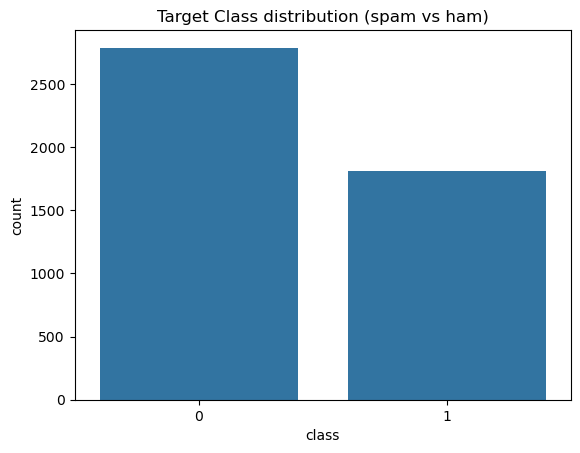

In [16]:
plt.figure()
sns.countplot(x=y)
plt.title("Target Class distribution (spam vs ham)")
plt.show()

Dataset is moderately balanced, no need of any more class balancing techniques

In [17]:
# Correlation
df.corr()['class'].sort_values(ascending=False).head(10)

class                       1.000000
word_freq_your              0.383234
word_freq_000               0.334787
word_freq_remove            0.332117
char_freq_%24               0.323629
word_freq_you               0.273651
word_freq_free              0.263215
word_freq_business          0.263204
capital_run_length_total    0.249164
word_freq_our               0.241920
Name: class, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

start_time = time.time()

log_reg = LogisticRegression(max_iter=1000)  # max_iter Ensures convergence after standardization
log_reg.fit(X_train_scaled, y_train)

train_time = time.time() - start_time

In [13]:
y_pred_lr = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

accuracy, precision, recall, f1, train_time

(0.9294245385450597,
 0.9209039548022598,
 0.8980716253443526,
 0.9093444909344491,
 0.12021231651306152)

In [14]:
# Hyper parameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [15]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000)

grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_lr.fit(X_train_scaled, y_train)


C:\Users\monis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [16]:
grid_search_lr.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}

In [17]:
grid_search_lr.best_score_

np.float64(0.923913043478261)

In [19]:
best_lr = grid_search_lr.best_estimator_

y_pred_lr_tuned = best_lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr_tuned)
precision_lr = precision_score(y_test, y_pred_lr_tuned)
recall_lr = recall_score(y_test, y_pred_lr_tuned)
f1_lr = f1_score(y_test, y_pred_lr_tuned)

best_lr, accuracy_lr, precision_lr, recall_lr, f1_lr


(LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga'),
 0.9305103148751357,
 0.9211267605633803,
 0.9008264462809917,
 0.9108635097493036)

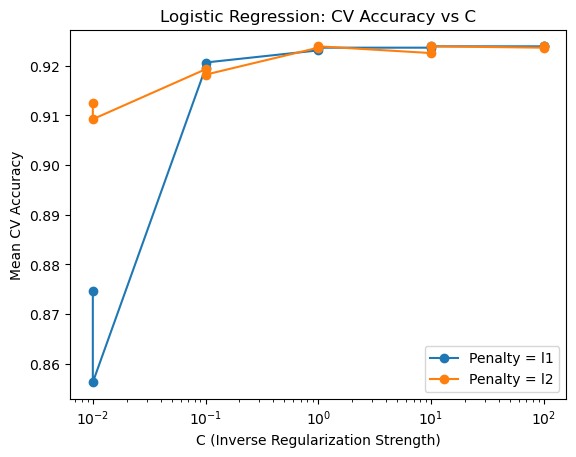

In [38]:
lr_results = pd.DataFrame(grid_search_lr.cv_results_)

plt.figure()

for penalty in lr_results['param_penalty'].unique():
    subset = lr_results[lr_results['param_penalty'] == penalty]
    plt.plot(
        subset['param_C'],
        subset['mean_test_score'],
        marker='o',
        label=f'Penalty = {penalty}'
    )

plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Mean CV Accuracy')
plt.title('Logistic Regression: CV Accuracy vs C')
plt.legend()
plt.show()

In [26]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time


In [21]:
start = time.time()

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

time_linear = time.time() - start
y_pred_linear = svm_linear.predict(X_test_scaled)

acc_linear = accuracy_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

In [22]:
# Polynonmial kernel

start = time.time()

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_scaled, y_train)

time_poly = time.time() - start
y_pred_poly = svm_poly.predict(X_test_scaled)

acc_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

In [23]:
# RBF kernel

start = time.time()

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

time_rbf = time.time() - start
y_pred_rbf = svm_rbf.predict(X_test_scaled)

acc_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

In [24]:
# sigmoid kernel

start = time.time()

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_scaled, y_train)

time_sigmoid = time.time() - start
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)

acc_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)

In [25]:
print("Linear   :", acc_linear, f1_linear, time_linear)
print("Poly     :", acc_poly, f1_poly, time_poly)
print("RBF      :", acc_rbf, f1_rbf, time_rbf)
print("Sigmoid  :", acc_sigmoid, f1_sigmoid, time_sigmoid)

Linear   : 0.9294245385450597 0.9093444909344491 0.6027734279632568
Poly     : 0.7795874049945711 0.6219739292364991 0.6716008186340332
RBF      : 0.9272529858849077 0.9055007052186178 0.36237120628356934
Sigmoid  : 0.8849077090119435 0.8527777777777777 0.3351321220397949


In [40]:
# Hyperparameter Tuning for SVM

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]   # used only for polynomial kernel
}

In [41]:
# grid search with k=5 folds
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC()

grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search_svm.fit(X_train_scaled, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [42]:
grid_search_svm.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [43]:
grid_search_svm.best_score_

np.float64(0.9331521739130435)

In [48]:
best_svm = grid_search_svm.best_estimator_

y_pred_svm_tuned = best_svm.predict(X_test_scaled)

acc_svm = accuracy_score(y_test, y_pred_svm_tuned)
prec_svm = precision_score(y_test, y_pred_svm_tuned)
rec_svm = recall_score(y_test, y_pred_svm_tuned)
f1_svm = f1_score(y_test, y_pred_svm_tuned)

print("Best kernel: ",best_svm.get_params()['kernel'])
print("Best values in SVM")
best_svm, acc_svm, prec_svm, rec_svm, f1_svm

Best kernel:  rbf
Best values in SVM


(SVC(C=10, degree=2),
 0.9207383279044516,
 0.9142857142857143,
 0.8815426997245179,
 0.8976157082748948)

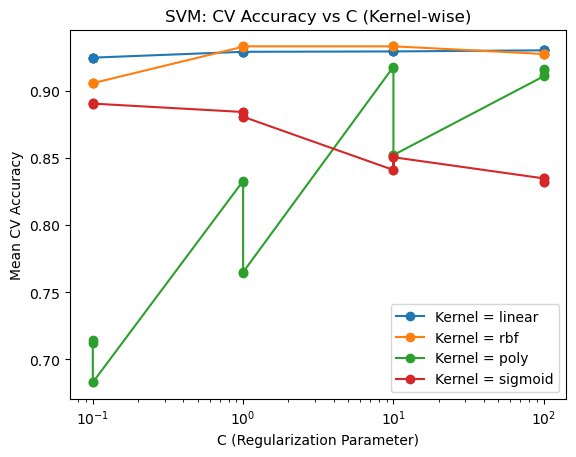

In [46]:
svm_results = pd.DataFrame(grid_search_svm.cv_results_)

plt.figure()

for kernel in svm_results['param_kernel'].unique():
    subset = svm_results[svm_results['param_kernel'] == kernel]
    plt.plot(
        subset['param_C'],
        subset['mean_test_score'],
        marker='o',
        label=f'Kernel = {kernel}'
    )

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean CV Accuracy')
plt.title('SVM: CV Accuracy vs C (Kernel-wise)')
plt.legend()
plt.show()

In [32]:
# Cross-Validation for Logistic Regression

from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(
    best_lr,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)

cv_lr

C:\Users\monis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.94021739, 0.91576087, 0.92255435, 0.91711957, 0.92527174])

In [33]:
cv_lr.mean()

np.float64(0.9241847826086957)

In [35]:
# Cross-Validation for SVM

cv_svm = cross_val_score(
    best_svm,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)

cv_svm

array([0.94293478, 0.93206522, 0.93342391, 0.92119565, 0.9361413 ])

In [36]:
cv_svm.mean()

np.float64(0.9331521739130435)